In [1]:
import warnings
def Dec2bin (num_decimal, width, frac, signedness = "unsigned"):
    """
    This function converts decimal to fixed point binaries, returns a string

    Parameters
    ----------
    num_decimal : float
        input floating point number.
    width : int
        Bit width of the output
    frac : int
        bit width of the fraction part. (number of bits for mantissa)
    signedness : string, optional
        The default is "signed". for unsigned convert, use "unsigned"

    Returns
    -------
    string. string for binary representation

    """
    num_int_part = int(num_decimal * (2 ** frac))
    if signedness == "signed":
        if num_int_part < 0:
            if (2 ** (width-1) + num_int_part) < 0:
                warnings.warn("Overflow may occur")
            num_string = f'{(2**width + num_int_part):0{width}b}'
        else:
            num_string = f'{num_int_part:0{width}b}'
            if (2 ** (width - 1) - num_int_part) <= 0:
                warnings.warn("Overflow may occur")
    elif signedness == "unsigned":
        num_string = f'{num_int_part:0{width}b}'
        if len(num_string) > width:
            warnings.warn("Overflow may occur")

    else:
        warnings.warn("Signedness should be signed or unsigned")
        
    return num_string

def Dec2hex (num_decimal, width, frac, signedness = "unsigned"):
    """
    This function converts decimal to fixed point hexadecimals, returns a string

    Parameters
    ----------
    num_decimal : float
        input floating point number.
    width : int
        Bit width of the output
    frac : int
        bit width of the fraction part. (number of bits for mantissa)
    signedness : string, optional
        The default is "signed". for unsigned convert, use "unsigned"

    Returns
    -------
    string. string for hexadecimals representation

    """
    num_int_part = int(num_decimal * (2 ** frac))
    if signedness == "signed":
        if num_int_part < 0:
            if (2 ** (width-1) + num_int_part) < 0:
                warnings.warn("Overflow may occur")
            num_string = f'{(2**width + num_int_part):0{width}b}'
        else:
            num_string = f'{num_int_part:0{width}b}'
            if (2 ** (width - 1) - num_int_part) <= 0:
                warnings.warn("Overflow may occur")
    elif signedness == "unsigned":
        num_string = f'{num_int_part:0{width}b}'
        if len(num_string) > width:
            warnings.warn("Overflow may occur")

    else:
        warnings.warn("Signedness should be signed or unsigned")
        
    return hex(int(num_string, 2))

def Bin2dec (num_binary, frac, signedness = "unsigned"):
    """
    Convert binary number to decimal number

    Parameters
    ----------
    num_binary : string or int
        The input binary number value
    frac : int
        bit width of the fraction part. (number of bits for mantissa)
    signedness : string, optional
        The default is "signed". for unsigned convert, use "unsigned"

    Returns
    -------
    float
        The decimal value of the input

    """
    num_binary = str(num_binary)
    if signedness == "unsigned":
        num_dec = int(num_binary, 2)
    elif signedness == "signed":
        if num_binary[0] == '1':
            num_dec_positive = int(num_binary, 2)
            num_dec = num_dec_positive - (2 ** (len(num_binary)*4))
        else:
            num_dec = int(num_binary, 2)
    return num_dec/(2 ** frac)

def Hex2dec (num_hex, frac, signedness = "unsigned"):
    """
    Convert hexadecimal number to decimal number

    Parameters
    ----------
    num_binary : string
        The input hexadecimal number value
    frac : int
        bit width of the fraction part. (number of bits for mantissa)
    signedness : string, optional
        The default is "signed". for unsigned convert, use "unsigned"

    Returns
    -------
    float
        The decimal value of the input

    """
    if signedness == "unsigned":
        num_dec = int(num_hex, 16)
    elif signedness == "signed":
        if num_hex[0] in ['8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'A', 'B', 'C', 'D', 'E', 'F']:
            num_dec_positive = int(num_hex, 16)
            num_dec = num_dec_positive - (2 ** (len(num_hex)*4))
        else:
            num_dec = int(num_hex, 16)
    return num_dec/(2 ** frac)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm
from hmmlearn import hmm
import math

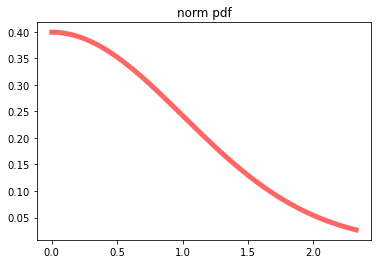

In [3]:
x = np.linspace(norm.ppf(0.5),
                 norm.ppf(0.99), 300)
y = norm.pdf(x, 0, 1)
plt.plot(x, y,
        'r-', lw=5, alpha=0.6, label='norm pdf')
plt.title("norm pdf")
plt.show()

In [26]:
xQuantized = [""] * len(x)
totalLen = 32
fracLen = 29
for i in range(len(x)):
    xQuantized[i] = Dec2bin (x[i], 32, 29, signedness = "unsigned")
yQuantized = [""] * len(y)
for i in range(len(y)):
    yQuantized[i] = Dec2bin (y[i], 32, 29, signedness = "unsigned")

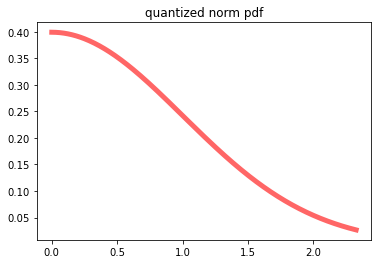

In [27]:
xDeQuantized = [1] * len(x)
for i in range(len(x)):
    xDeQuantized[i] = Bin2dec (xQuantized[i], 29, signedness = "unsigned")
yDeQuantized = [1] * len(y)
for i in range(len(y)):
    yDeQuantized[i] = Bin2dec (yQuantized[i], 29, signedness = "unsigned")

plt.plot(xDeQuantized, yDeQuantized,
        'r-', lw=5, alpha=0.6, label='norm pdf')
plt.title("quantized norm pdf")
plt.show()

In [28]:
myVhdHead = ["Library IEEE;",
             "Use IEEE.STD_LOGIC_1164.ALL;",
             "USE IEEE.NUMERIC_STD.ALL;",
             "USE IEEE.STD_LOGIC_UNSIGNED.ALL",
             "ENTITY GaussianLUT IS",
             "    PORT (",
             "        x_in : IN STD_LOGIC_VECTOR (31 DOWNTO 0);",
             "        y_out : OUT STD_LOGIC_VECTOR (31 DOWNTO 0)",
             "    );",
             "END GaussianLUT;",
             "ARCHITECTURE LUT of GaussianLUT is",
             "BEGIN",
             "    PROCESS (x_in) IS",
             "    BEGIN",
             "        CASE to_integer(unsigned(x_in)) IS"
            ]
myVhdTail = ["        END CASE;",
             "    END PROCESS;",
             "END LUT;"
            ]

myVhdBody = [""] * len(x)
for i in range(len(x) - 1):
    myVhdBody[i] = ('        WHEN ' + str(int(Bin2dec(xQuantized[i], 0, "unsigned")))
                    + " to " + str(int(Bin2dec(xQuantized[i + 1], 0, "unsigned")))
                    + ' => y_out <= "' + yQuantized[i] + '";')
myVhdBody[len(x) - 1] = "1" * totalLen
    
my_file = open("./LUT/GaussianLUT.txt", "w")
for row in myVhdHead:
    my_file.write(row + '\n')
for row in myVhdBody:
    my_file.write(row + '\n')
for row in myVhdTail:
    my_file.write(row + '\n')
my_file.close()